# Segmenting and Clustering Neighborhoods in the City of Toronto

### -------------------------------Answer:1-------------------------------------------------------

In [ ]:
#install Beautifulsoup
!conda install -c conda-forge beautifulsoup4 --yes

In [ ]:
#install lxml
!conda install -c conda-forge lxml --yes

In [1]:
#import libraries

from bs4 import BeautifulSoup  #library for website scrapping
import requests

import folium         # map rendering library
import pandas as pd   # library for data analsysis

from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values
import numpy as np  # library to handle data in a vectorized manner

from sklearn.cluster import KMeans  # import k-means from clustering stage


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [2]:
#Access the wiki page text using Beautifulsoup

url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

source = requests.get(url).text

soup=BeautifulSoup(source,'lxml')
    
#print(soup.prettify())    

 
    

In [3]:
#Retreive table header  from <th> tag  (i.e. column names - Postcode,Borough,Neighbourhood)

columns=[]

table= soup.find('table',class_='wikitable sortable')

table_header = table.find_all('th')

columns=[col.text.strip() for col in table_header]

#print(columns)


#Retreive table data from each row , each cell  ( from <tr> <td>  tags)

row_data=[]

table_rows=table.find_all('tr')

for tr in table_rows:
    if(tr.find('td')):
        td=tr.find_all('td')
        row_data.append([i.text.strip() for i in td])

#print(row_data)        
        
 

In [4]:
#convert table data in to dataframe

neighbourhood=pd.DataFrame(row_data)

neighbourhood.columns=['PostalCode','Borough','Neighbourhood']


#Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
neighbourhood=neighbourhood[neighbourhood['Borough'] != 'Not assigned']


#More than one neighborhood can exist in one postal code area. For example, in the table on the 
#Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: 
#Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods 
#separated with a comma as shown in row 11 in the above table.

neighbourhood_combined=neighbourhood.groupby(['PostalCode','Borough'], sort = False).agg(lambda x: ','.join(x)).reset_index()

neighbourhood_combined.head(10)



,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Not assigned
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


In [5]:
#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be 
#the same as the borough. So for the 9th cell in the table on the Wikipedia page,
#the value of the Borough and the Neighborhood columns will be Queen's Park.

neighbourhood_combined.loc[neighbourhood_combined["Neighbourhood"] == "Not assigned","Neighbourhood"]=neighbourhood_combined["Borough"]

neighbourhood_combined.head(10)

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront,Regent Park"
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


In [6]:
neighbourhood_combined.shape

(103, 3)

### --------------------Answer:2--------------------------------------------------------------

In [7]:

#read csv file that contains geographical coordinates of neighbourhoods

df_coordinates=pd.read_csv("Geospatial_Coordinates.csv")

df_coordinates.columns=["PostalCode","Latitude","Longitude"]

df_coordinates.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
#combined the coordinates with the neighbourhood dataframe and arrange data in ascending order of Postcode

neighbourhood_final=neighbourhood_combined.join(df_coordinates.set_index('PostalCode'), on='PostalCode')

neighbourhood_final.sort_values("PostalCode")

neighbourhood_final.reset_index(drop=True)

neighbourhood_final




,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront,Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


### ----------------Answer:3-----------------------------------------------------
#### Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

### I have decided to explore and cluster the neighbourhoods of "Central Toronto"


In [9]:
central_toronto_data=neighbourhood_final[neighbourhood_final["Borough"] == "Central Toronto"].reset_index(drop=True)
central_toronto_data

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307
4,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
5,M5R,Central Toronto,"The Annex,North Midtown,Yorkville",43.672710,-79.405678
6,M4S,Central Toronto,Davisville,43.704324,-79.388790
7,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
8,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


In [10]:
# Let's get the geographical coordinates of Central Toronto

 
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.653963, -79.387207.


In [11]:
# create map of Central Toronto using latitude and longitude values


map_central_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(central_toronto_data['Latitude'], central_toronto_data['Longitude'], central_toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_central_toronto)  
    
map_central_toronto

In [12]:
#utilizing the Foursquare API to explore the neighborhoods 

# Define Foursquare Credentials and Version

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


# Explore Neighborhoods in Central Toronto


In [13]:
#function to repeat the same process to all the neighborhoods in Central Toronto


LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [14]:
#run the above function on each neighborhood and create a new dataframe called central_toronto_venues.
central_toronto_venues = getNearbyVenues(names= central_toronto_data['Neighbourhood'],
                                   latitudes= central_toronto_data['Latitude'],
                                   longitudes= central_toronto_data['Longitude']
                                  )


Lawrence Park
Roselawn
Davisville North
Forest Hill North,Forest Hill West
North Toronto West
The Annex,North Midtown,Yorkville
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West


In [15]:
# Let's check the size of the resulting dataframe
print(central_toronto_venues.shape)
central_toronto_venues.head(20)

(118, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,The Photo School – Toronto,43.730429,-79.388767,Photography Studio
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Roselawn,43.711695,-79.416936,Rosalind's Garden Oasis,43.712189,-79.411978,Garden
5,Roselawn,43.711695,-79.416936,Aquatics Academy Inc.,43.709951,-79.412127,Pool
6,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
7,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
8,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
9,Davisville North,43.712751,-79.390197,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel


In [16]:
#Let's check how many venues were returned for each neighborhood

central_toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Davisville,35,35,35,35,35,35
Davisville North,10,10,10,10,10,10
"Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West",15,15,15,15,15,15
"Forest Hill North,Forest Hill West",4,4,4,4,4,4
Lawrence Park,4,4,4,4,4,4
"Moore Park,Summerhill East",3,3,3,3,3,3
North Toronto West,19,19,19,19,19,19
Roselawn,2,2,2,2,2,2
"The Annex,North Midtown,Yorkville",26,26,26,26,26,26


In [17]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(central_toronto_venues['Venue Category'].unique())))

There are 64 uniques categories.


# Analyze Each Neighborhood

In [18]:
# one hot encoding
central_toronto_onehot = pd.get_dummies(central_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
central_toronto_onehot['Neighbourhood'] = central_toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [central_toronto_onehot.columns[-1]] + list(central_toronto_onehot.columns[:-1])
central_toronto_onehot = central_toronto_onehot[fixed_columns]

central_toronto_onehot.head()

,Neighbourhood,American Restaurant,BBQ Joint,Bagel Shop,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Chinese Restaurant,...,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Lawrence Park,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Roselawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#let's examine the new dataframe size.

central_toronto_onehot.shape

(118, 65)

In [20]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
central_toronto_grouped = central_toronto_onehot.groupby('Neighbourhood').mean().reset_index()
central_toronto_grouped

,Neighbourhood,American Restaurant,BBQ Joint,Bagel Shop,Breakfast Spot,Brewery,Burger Joint,Bus Line,Café,Chinese Restaurant,...,Supermarket,Sushi Restaurant,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Davisville,0.000000,0.000000,0.000000,0.0,0.028571,0.028571,0.00,0.057143,0.000000,...,0.000000,0.057143,0.00,0.000000,0.028571,0.028571,0.000000,0.000000,0.000000,0.000000
1,Davisville North,0.000000,0.000000,0.000000,0.1,0.000000,0.100000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",0.066667,0.000000,0.066667,0.0,0.000000,0.000000,0.00,0.066667,0.000000,...,0.066667,0.066667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
3,"Forest Hill North,Forest Hill West",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
4,Lawrence Park,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.000000,0.000000,...,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Moore Park,Summerhill East",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
6,North Toronto West,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.00,0.000000,0.052632,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632
7,Roselawn,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"The Annex,North Midtown,Yorkville",0.038462,0.038462,0.000000,0.0,0.000000,0.038462,0.00,0.115385,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000


In [21]:
# Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in central_toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = central_toronto_grouped[central_toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Davisville----
                venue  freq
0         Pizza Place  0.09
1        Dessert Shop  0.09
2      Sandwich Place  0.09
3  Italian Restaurant  0.06
4                Café  0.06


----Davisville North----
               venue  freq
0  Food & Drink Shop   0.1
1               Park   0.1
2     Breakfast Spot   0.1
3     Sandwich Place   0.1
4       Burger Joint   0.1


----Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West----
                venue  freq
0         Coffee Shop  0.13
1                 Pub  0.13
2         Pizza Place  0.07
3  Light Rail Station  0.07
4          Sports Bar  0.07


----Forest Hill North,Forest Hill West----
                venue  freq
0       Jewelry Store  0.25
1               Trail  0.25
2  Mexican Restaurant  0.25
3    Sushi Restaurant  0.25
4  Photography Studio  0.00


----Lawrence Park----
                venue  freq
0  Photography Studio  0.25
1                Park  0.25
2            Bus Line  0.25
3         Swim School  0.25
4      

In [22]:
# Let's put that into a pandas dataframe

#function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:

#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = central_toronto_grouped['Neighbourhood']

for ind in np.arange(central_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(central_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Farmers Market,French Restaurant,Diner
1,Davisville North,Clothing Store,Park,Food & Drink Shop,Hotel,Sandwich Place,Dance Studio,Dog Run,Burger Joint,Breakfast Spot,Gym
2,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",Pub,Coffee Shop,American Restaurant,Supermarket,Convenience Store,Light Rail Station,Café,Pizza Place,Sports Bar,Sushi Restaurant
3,"Forest Hill North,Forest Hill West",Trail,Jewelry Store,Sushi Restaurant,Mexican Restaurant,Yoga Studio,Fried Chicken Joint,Dog Run,Farmers Market,Fast Food Restaurant,Food & Drink Shop
4,Lawrence Park,Bus Line,Photography Studio,Swim School,Park,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food & Drink Shop,French Restaurant,Yoga Studio
5,"Moore Park,Summerhill East",Trail,Playground,Tennis Court,Yoga Studio,French Restaurant,Dog Run,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Garden
6,North Toronto West,Coffee Shop,Sporting Goods Shop,Yoga Studio,Spa,Gift Shop,Fast Food Restaurant,Mexican Restaurant,Park,Diner,Dessert Shop
7,Roselawn,Garden,Pool,Yoga Studio,Hotel,Gym / Fitness Center,Gym,Greek Restaurant,Gourmet Shop,Gift Shop,Fried Chicken Joint
8,"The Annex,North Midtown,Yorkville",Coffee Shop,Sandwich Place,Café,Park,Pizza Place,Indian Restaurant,BBQ Joint,Burger Joint,Convenience Store,Cosmetics Shop


# Cluster Neighborhoods

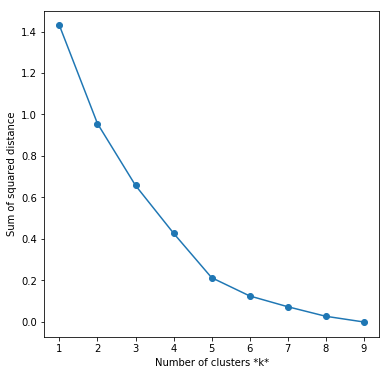

In [24]:
# Use elbow method to find out optimal number of clusters


sse = []
list_k = list(range(1, 10))

central_toronto_grouped_clustering = central_toronto_grouped.drop('Neighbourhood', 1)

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(central_toronto_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [25]:
#From the above plot, the optimal number of clusters is 5.so let's group the data in 5 clusters


# set number of clusters
kclusters = 5

#central_toronto_grouped_clustering = central_toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++",n_clusters=kclusters, random_state=0).fit(central_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 3, 4, 0, 2, 1, 2], dtype=int32)

In [26]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted["Cluster Labels"] = neighborhoods_venues_sorted["Cluster Labels"].astype('int32')

central_toronto_merged = central_toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
central_toronto_merged = central_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

central_toronto_merged.head() 

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4,Bus Line,Photography Studio,Swim School,Park,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food & Drink Shop,French Restaurant,Yoga Studio
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936,1,Garden,Pool,Yoga Studio,Hotel,Gym / Fitness Center,Gym,Greek Restaurant,Gourmet Shop,Gift Shop,Fried Chicken Joint
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197,2,Clothing Store,Park,Food & Drink Shop,Hotel,Sandwich Place,Dance Studio,Dog Run,Burger Joint,Breakfast Spot,Gym
3,M5P,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307,3,Trail,Jewelry Store,Sushi Restaurant,Mexican Restaurant,Yoga Studio,Fried Chicken Joint,Dog Run,Farmers Market,Fast Food Restaurant,Food & Drink Shop
4,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2,Coffee Shop,Sporting Goods Shop,Yoga Studio,Spa,Gift Shop,Fast Food Restaurant,Mexican Restaurant,Park,Diner,Dessert Shop


In [27]:
#Finally, let's visualize the resulting clusters


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(central_toronto_merged['Latitude'], central_toronto_merged['Longitude'], central_toronto_merged['Neighbourhood'], central_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

In [28]:
# Cluster 1
#Cluster is formed with the venues related to sports e.g. "Playgound" or "Tennis court"
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 0, central_toronto_merged.columns[[1] + list(range(5, central_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Central Toronto,0,Trail,Playground,Tennis Court,Yoga Studio,French Restaurant,Dog Run,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Garden


In [29]:
#Cluster 2
#Cluster is formed with the "gift shop" or "gourmet shop" venues 
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 1, central_toronto_merged.columns[[1] + list(range(5, central_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Central Toronto,1,Garden,Pool,Yoga Studio,Hotel,Gym / Fitness Center,Gym,Greek Restaurant,Gourmet Shop,Gift Shop,Fried Chicken Joint


In [30]:
#Cluster 3
#Cluster is formed with the "Coffee shop" or "Sandwitch place" venues
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 2, central_toronto_merged.columns[[1] + list(range(5, central_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Central Toronto,2,Clothing Store,Park,Food & Drink Shop,Hotel,Sandwich Place,Dance Studio,Dog Run,Burger Joint,Breakfast Spot,Gym
4,Central Toronto,2,Coffee Shop,Sporting Goods Shop,Yoga Studio,Spa,Gift Shop,Fast Food Restaurant,Mexican Restaurant,Park,Diner,Dessert Shop
5,Central Toronto,2,Coffee Shop,Sandwich Place,Café,Park,Pizza Place,Indian Restaurant,BBQ Joint,Burger Joint,Convenience Store,Cosmetics Shop
6,Central Toronto,2,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Café,Coffee Shop,Sushi Restaurant,Farmers Market,French Restaurant,Diner
8,Central Toronto,2,Pub,Coffee Shop,American Restaurant,Supermarket,Convenience Store,Light Rail Station,Café,Pizza Place,Sports Bar,Sushi Restaurant


In [31]:
#Cluster 4
#Cluster is formed with the "Jewelry store" venues. 
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 3, central_toronto_merged.columns[[1] + list(range(5, central_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Central Toronto,3,Trail,Jewelry Store,Sushi Restaurant,Mexican Restaurant,Yoga Studio,Fried Chicken Joint,Dog Run,Farmers Market,Fast Food Restaurant,Food & Drink Shop


In [32]:
#Cluster 5
#Cluster is formed with the "bus line" or "photography studio" venues.
central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 4, central_toronto_merged.columns[[1] + list(range(5, central_toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,4,Bus Line,Photography Studio,Swim School,Park,Fried Chicken Joint,Farmers Market,Fast Food Restaurant,Food & Drink Shop,French Restaurant,Yoga Studio


### ---------------------------------End-----------------------------------------